### Important

*Requires Sage Kernel*

In [1]:
%pip list

Package                            Version
---------------------------------- ----------
appnope                            0.1.4
asttokens                          2.4.1
Babel                              2.13.1
beautifulsoup4                     4.12.2
bracex                             2.4
certifi                            2023.11.17
cfgv                               3.4.0
charset-normalizer                 3.3.2
click                              8.1.7
colorama                           0.4.6
comm                               0.2.2
contourpy                          1.2.0
cycler                             0.12.1
debugpy                            1.8.1
decorator                          5.1.1
distlib                            0.3.8
executing                          2.0.1
filelock                           3.14.0
fonttools                          4.50.0
ghp-import                         2.1.0
gitdb                              4.0.11
GitPython                          3.1.40

# Queuing and Performance Analysis

## Notation
| Symbol | Meaning | Relationships |
|---|---|---|
| $\lambda$ | Arrival Rate | - |
| $\tau_a$ | Mean Inter-arrival Time | $\tau_a=1/\lambda$ |
| $\sigma_a$ | Standard deviation of inter-arrival times | - |
| $c_a$ | Coefficient of Variation of inter-arrival times | $c_a = \tau_a/\sigma_a$ |
| $\mu$ | Processing Rate | - |
| $\tau_s$ | Mean Processing Time | $\tau_s=1/\mu$ |
| $\sigma_s$ | Standard deviation of processing times | - | 
| $c_s$ | Coefficient of Variation of inter-arrival times | $c_s = \tau_s/\sigma_s$ |
| $L_q$ | Mean number of jobs waiting in system | - |
| $L$ | Mean total number of jobs in system | - |
| $W_q$ | Mean time spent queueing by job | - |
| $W$ | Sojourn time, time spent in system by job | $W = W_q + \tau_s$ |
| $\rho$ | Utilization | $\rho = \lambda / \mu = \tau_s / \tau_a$ |
| $QF$ | Queuing Factor | $QF = W / \tau = 1 + W_q / \tau$ |
| $E[w]$ | Expectation of random variable $w$ | - |
| $P_b$ | Probability of Blocking (Erlang-B) | - |
| $P_w$ | Probability of Waiting (Erlang-C) | - |
| $n$ | Number of identical parallel resources such as servers, telephone lines, etc. | - |
| $E$ | Normalized ingress load (offered traffic stated in erlang)| $E=\lambda h= \lambda W_q$ |
| $h$ | Mean call duration time in Erlang call center formulas, in terms of queueing, it is the Mean time queuing $\tau_s$ | $h=\tau_s$ |

## Key Equations

| Equation | Formula | Notes |
|---|---|---|
| Little's Law | $L = \lambda W$ | - |
| M/M/1 Wait Time | $E[W_q] = \tau_s \frac{\rho}{1-\rho}$ | [Wikipedia](https://en.wikipedia.org/wiki/M/M/1_queue) |
| M/M/1 Sojourn Time | $E[W] = \tau_s \frac{1}{1-\rho}$ | [Wikipedia](https://en.wikipedia.org/wiki/M/M/1_queue) |
| G/G/1 Wait Time | $E[W_q] \approx \tau_s \left( \frac{\rho}{1-\rho} \right) \left( \frac{c_a^2+c_s^2}{2}\right)$ | [Wikipedia](https://en.wikipedia.org/wiki/G/G/1_queue) |
| G/G/1 Sojourn Time | $E[W_q] \approx \tau_s + \tau_s \left( \frac{\rho}{1-\rho} \right) \left( \frac{c_a^2+c_s^2}{2}\right)$ | [Wikipedia](https://en.wikipedia.org/wiki/G/G/1_queue) |
| Erlang B Formula | $P_b = B(E,n) = \frac{E^n}{n!\sum_{i=0}^n \frac{E^i}{i!}}$ | [Wikipedia](https://en.wikipedia.org/wiki/Erlang_(unit))<br>[Abstract Micro](http://abstractmicro.com/erlang/helppages/mod-b.htm) |
| Erlang C Formula | $P_w = {{\frac{E^n}{n!} \frac{n}{n - E}} \over \left ( \sum\limits_{i=0}^{n-1} \frac{E^i}{i!} \right ) + \frac{E^n}{n!} \frac{n}{n - E}}$<br>$P_w = \frac{nP_b}{(n − E)(1−P_b)}$ | [Wikipedia](https://en.wikipedia.org/wiki/Erlang_(unit)) </br>[Abstract Micro](http://abstractmicro.com/erlang/helppages/mod-c.htm) |
| Erlanc C Wait time | $W_q= \frac{\tau_s*P_w}{n-E}$ | [Hard to Know](https://www.had2know.org/technology/erlang-c-formula-calculator.html) |

# Jupyter Help

* [Symbolic Math](https://dynamics-and-control.readthedocs.io/en/latest/0_Getting_Started/Notebook%20introduction.html)
* [Latex Math](https://tilburgsciencehub.com/building-blocks/collaborate-and-share-your-work/write-your-paper/amsmath-latex-cheatsheet/)
* [More Latex Match Cheatsheet](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index)



In [6]:
import sympy
import numpy as np
from matplotlib import pyplot as plt

sympy.init_printing(use_latex=True)



In [7]:
## Symbol Declararions
n = sympy.Symbol('n')
tau_s = sympy.Symbol('tau_s')
tau_a = sympy.Symbol('tau_a')
c_s = sympy.Symbol('c_s')
c_a = sympy.Symbol('c_a')
pX = sympy.Symbol('pX')

mu = sympy.Symbol('mu')
s_lambda = sympy.Symbol('lambda')
rho = sympy.Symbol('rho')

W = sympy.Symbol('W')
W_q = sympy.Symbol('W_q')
L_q = sympy.Symbol('L_q')
L = sympy.Symbol('L')
QF = sympy.Symbol('QF')

[mu, s_lambda, tau_s, tau_a, c_s, c_a, W, W_q, L, rho, QF, n]

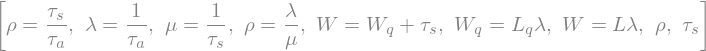

In [8]:
## Basic Relationships
utilization_eq = sympy.Eq(rho, tau_s / tau_a)
arrival_rate_eq = sympy.Eq(s_lambda, 1 / tau_a)
processing_rate_eq = sympy.Eq(mu, 1 / tau_s)
rho_eq = sympy.Eq(rho, s_lambda/mu)
W_eq = sympy.Eq(W, W_q + tau_s)

## Little's Law
littles_q_eq = sympy.Eq(W_q, L_q * s_lambda)
littles_eq = sympy.Eq(W, L * s_lambda)


## Erlang relationships

erlang_h = tau_s
erlang_E = rho

[utilization_eq, arrival_rate_eq, processing_rate_eq, rho_eq, W_eq, littles_q_eq, littles_eq, erlang_E, erlang_h]

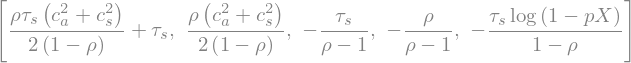

In [9]:
## Queuing Definitions

W_gg1 = tau_s + tau_s * (rho/(1-rho)) * (c_a**2+c_s**2) / 2
QF_gg1 = (W_gg1 - tau_s)/tau_s

P_mm1 = tau_s * (-sympy.ln(1-pX))/(1-rho)
W_mm1 = sympy.simplify(W_gg1.subs([(c_a, 1.0), (c_s, 1.0)]))
QF_mm1 = sympy.simplify((W_mm1-tau_s)/tau_s)

[W_gg1, QF_gg1, W_mm1, QF_mm1, P_mm1]


In [10]:
w_mm1_lambda = sympy.lambdify((rho, tau_s), W_mm1)
pX_mm1_lambda = sympy.lambdify((rho, tau_s, pX), P_mm1)
p10(u) = P_mm1.subs([(tau_s, t_a), (pX, 0.1), (rho, u)])
p90(u) = P_mm1.subs([(tau_s, t_a), (pX, 0.9), (rho, u)])
AverageCurve(u) = W_mm1.subs([(tau_s, t_a), (rho, u)])


SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (214734131.py, line 3)

In [12]:
min_rh0 = 0
max_rho = 0.99
t_a = 1.0

avg_curve = plot(AverageCurve, (u, min_rho, max_rho), legend_label="$Mean$", color='blue')

diagram = avg_curve

diagram.legend(False)
diagram.axes_labels(['$\\rho$', 'Lead Time ($W$)'])
diagram.axes_labels_size(1.0)

diagram.show(title="Mean Lead Time ($W$) by Utilization ($\\rho$)", gridlines='automatic')

NameError: name 'AverageCurve' is not defined

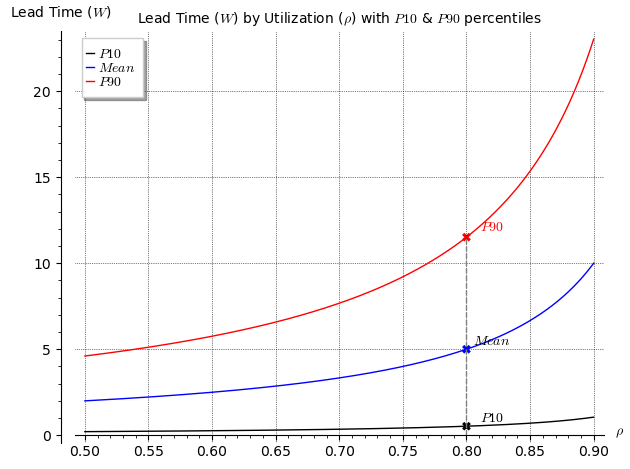

In [ ]:
t_a = 1.0

min_rho = 0.5
max_rho = 0.9
rho_scale = (max_rho-min_rho)/20



ref_point = 0.8

P10_80_point = point((ref_point, pX_mm1_lambda(ref_point, t_a, 0.1)), color="black", marker="X", size=40)
P10_80_Label = text('$P10$', (ref_point+rho_scale, pX_mm1_lambda(ref_point, t_a, 0.1)+0.5), color='black', fontsize=10)
P10_curve = plot(p10, (u, min_rho, max_rho), legend_label='$P10$', color='black')
P10 = P10_80_point + P10_80_Label + P10_curve

avg_point = point((ref_point, w_mm1_lambda(ref_point, t_a)), color="blue", marker="X", size=40)
avg_label = text('$Mean$', (ref_point+rho_scale, w_mm1_lambda(ref_point, t_a)+0.5), color='black', fontsize=10)
avg_curve = plot(AverageCurve, (u, min_rho, max_rho), legend_label='$Mean$', color='blue')
Avg = avg_curve + avg_point + avg_label

P90_80_point = point((ref_point, pX_mm1_lambda(ref_point, t_a, 0.9)), color="red", marker="X", size=40)
P90_80_Label = text('$P90$', (ref_point+rho_scale,pX_mm1_lambda(ref_point, t_a, 0.9)+0.6), color='red', fontsize=10)
P90_curve = plot(p90, (u, min_rho, max_rho), legend_label="$P90$", color='red')
P90 = P90_curve + P90_80_point + P90_80_Label

ref_point_line = line([(ref_point, 0), (ref_point, pX_mm1_lambda(ref_point, t_a, 0.9))], color="grey", linestyle='--')

diagram = P10 + Avg + P90 + ref_point_line
diagram.legend()
diagram.axes_labels(['$\\rho$', 'Lead Time ($W$)'])
diagram.axes_labels_size(1.0)

diagram.show(title="Lead Time ($W$) by Utilization ($\\rho$) with $P10$ & $P90$ percentiles", gridlines='automatic')

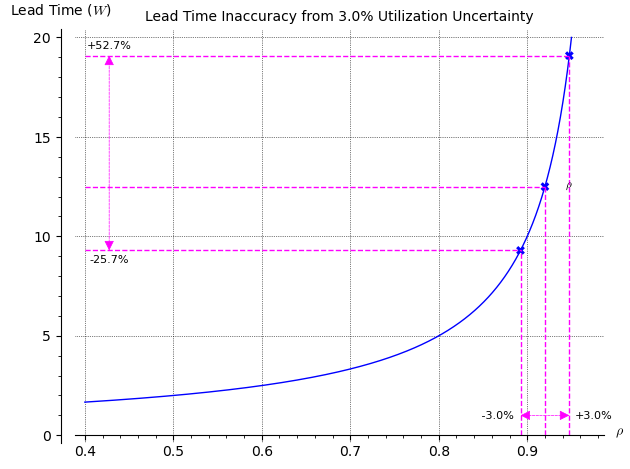

In [ ]:
t_a = 1.0

min_rho = 0.4
max_rho = 0.95
rho_scale = (max_rho-min_rho)/20


ref_point = 0.92
error = 0.03
low_ref_point = ref_point*(1-error)
high_ref_point = ref_point*(1+error)

low_P10 = pX_mm1_lambda(low_ref_point, t_a, 0.1)
low_P90 = pX_mm1_lambda(low_ref_point, t_a, 0.9)
low_Avg =  w_mm1_lambda(low_ref_point, t_a)
ref_P10 = pX_mm1_lambda(ref_point, t_a, 0.1)
ref_P90 = pX_mm1_lambda(ref_point, t_a, 0.9)
ref_Avg =  w_mm1_lambda(ref_point, t_a)
high_P10 = pX_mm1_lambda(high_ref_point, t_a, 0.1)
high_P90 = pX_mm1_lambda(high_ref_point, t_a, 0.9)
high_Avg =  w_mm1_lambda(high_ref_point, t_a)

w_high_error = high_Avg/ref_Avg - 1
w_low_error = 1 - low_Avg/ref_Avg

# P10_low_point = point((low_ref_point, low_P10), color="black", marker="X", size=40)
# P10_low_Label = text('$P10$', (low_ref_point+rho_scale, low_P10+0.5), color='black', fontsize=10)
# P10_ref_point = point((ref_point, ref_P10), color="black", marker="X", size=40)
# P10_ref_Label = text('$P10$', (ref_point+rho_scale, ref_P10+0.5), color='black', fontsize=10)
# P10_high_point = point((high_ref_point, high_P10), color="black", marker="X", size=40)
# P10_high_Label = text('$P10$', (high_ref_point+rho_scale, high_P10+0.5), color='black', fontsize=10)
# P10_curve = plot(p10, (u, min_rho, max_rho), legend_label='$P10$', color='black')
# P10 = P10_low_point + P10_low_Label + P10_ref_point + P10_ref_Label + P10_high_point + P10_high_Label + P10_curve

avg_low_point = point((low_ref_point, low_Avg), color="blue", marker="X", size=40)
avg_low_label = text(" -{:.1f}%".format(error*100), (low_ref_point-rho_scale, 1), color='black', fontsize=8)
avg_ref_point = point((ref_point, ref_Avg), color="blue", marker="X", size=40)
avg_ref_label = text('$\\rho$', (ref_point+rho_scale, ref_Avg), color='black', fontsize=8)
avg_high_point = point((high_ref_point, high_Avg), color="blue", marker="X", size=40)
avg_high_label = text("+{:.1f}%".format(error*100), (high_ref_point+rho_scale, 1), color='black', fontsize=8)
avg_curve = plot(AverageCurve, (u, min_rho, max_rho), legend_label='$Mean$', color='blue')
Avg = avg_curve + avg_low_point + avg_low_label + avg_ref_point + avg_ref_label + avg_high_point + avg_high_label

# P90_low_point = point((low_ref_point, low_P90), color="red", marker="X", size=40)
# P90_low_Label = text('$P90$', (low_ref_point+rho_scale, low_P90+0.6), color='red', fontsize=10)
# P90_ref_point = point((ref_point, ref_P90), color="red", marker="X", size=40)
# P90_ref_Label = text('$P90$', (ref_point+rho_scale, ref_P90+0.6), color='red', fontsize=10)
# P90_high_point = point((high_ref_point, high_P90), color="red", marker="X", size=40)
# P90_high_Label = text('$P90$', (high_ref_point, high_P90+0.6), color='red', fontsize=10)
# P90_curve = plot(p90, (u, min_rho, max_rho), legend_label="$P90$", color='red')
# P90 = P90_curve + P90_low_point + P90_low_Label + P90_ref_point + P90_ref_Label + P90_high_point + P90_high_Label

ref_low_point_line = line([(low_ref_point, 0), (low_ref_point, low_Avg)], color="magenta", linestyle='--')
ref_point_line = line([(ref_point, 0), (ref_point, ref_Avg)], color="magenta", linestyle='--')
ref_high_point_line = line([(high_ref_point, 0), (high_ref_point, high_Avg)], color="magenta", linestyle='--')
ref_v_lines = ref_low_point_line + ref_point_line + ref_high_point_line

ref_low_Avg_line = line([(min_rho, low_Avg), (low_ref_point, low_Avg)], color='magenta', linestyle='--')
ref_Avg_line = line([(min_rho, ref_Avg), (ref_point, ref_Avg)], color='magenta', linestyle='--')
ref_high_Avg_line = line([(min_rho, high_Avg), (high_ref_point, high_Avg)], color='magenta', linestyle='--')
ref_h_lines = ref_low_Avg_line + ref_Avg_line + ref_high_Avg_line

low_arrow = arrow((min_rho+rho_scale, low_Avg), (min_rho+rho_scale, ref_Avg), head=0, color='magenta', linestyle='--', width=0.5, arrowsize=3)
high_arrow = arrow((min_rho+rho_scale, ref_Avg), (min_rho+rho_scale, high_Avg), head=1, color='magenta', linestyle='--', width=0.5, arrowsize=3)
left_arrow = arrow((low_ref_point, 1), (ref_point, 1), head=0, color='magenta', linestyle='--', width=0.5, arrowsize=3)
right_arrow = arrow((high_ref_point, 1), (ref_point, 1), head=0, color='magenta', linestyle='--', width=0.5, arrowsize=3)
arrows = low_arrow + high_arrow + left_arrow + right_arrow

high_error_text = text("+{:.1f}%".format(w_high_error*100), (min_rho+rho_scale, high_Avg+0.5), color='black', fontsize=8)
low_error_text = text("-{:.1f}%".format(w_low_error*100), (min_rho+rho_scale, low_Avg-0.5), color='black', fontsize=8)

ref_lines = ref_v_lines + ref_h_lines + arrows + high_error_text + low_error_text


diagram = Avg + ref_lines
diagram.legend(False)
diagram.axes_labels(['$\\rho$', 'Lead Time ($W$)'])
diagram.axes_labels_size(1.0)

diagram.show(title="Lead Time Inaccuracy from {:.1f}% Utilization Uncertainty".format(error*100), gridlines='automatic')

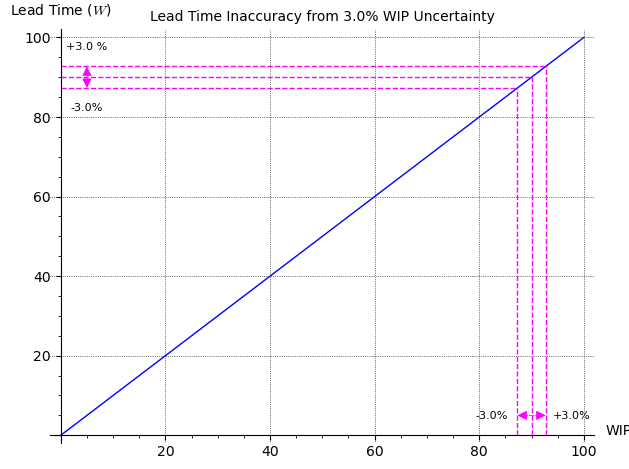

In [ ]:
W_Little = s_lambda * L
W_Little

min_wip = 0
max_wip = 100
wip_scale = (max_wip-min_wip)/20

target_lambda = 1.0
lambda_error = 0.1
min_lambda = target_lambda*(1-lambda_error)
max_lambda = target_lambda*(1+lambda_error)

Wt(tl, wip) = W_Little.subs([(s_lambda, tl), (L, wip)])
Wt_nominal(wip) =  W_Little.subs([(s_lambda, target_lambda), (L, wip)])
Wt_lambda = sympy.lambdify((s_lambda, L), W_Little)

ref_wip = 90
error = 0.03
low_ref_wip = ref_wip*(1-error)
high_ref_wip = ref_wip*(1+error)

nominal = plot(Wt_nominal, (wip, min_wip, max_wip), legend_label='Nominal $\\lambda$', color='blue')

low_wt = Wt_lambda(target_lambda, low_ref_wip)
target_wt = Wt_lambda(target_lambda, ref_wip)
high_wt = Wt_lambda(target_lambda, high_ref_wip)

w_high_error = high_wt/target_wt - 1
w_low_error = 1 - low_wt/target_wt


ref_low_point_line = line([(low_ref_wip, 0), (low_ref_wip, low_wt)], color="magenta", linestyle='--')
ref_point_line = line([(ref_wip, 0), (ref_wip, target_wt)], color="magenta", linestyle='--')
ref_high_point_line = line([(high_ref_wip, 0), (high_ref_wip, high_wt)], color="magenta", linestyle='--')
ref_v_lines = ref_low_point_line + ref_point_line + ref_high_point_line

ref_low_target_line = line([(min_wip, low_wt), (low_ref_wip, low_wt)], color='magenta', linestyle='--')
ref_target_line = line([(min_wip, target_wt), (ref_wip, target_wt)], color='magenta', linestyle='--')
ref_high_target_line = line([(min_wip, high_wt), (high_ref_wip, high_wt)], color='magenta', linestyle='--')

high_wip_label = text("+{:.1f}%".format(error*100), (high_ref_wip+wip_scale, 5), color='black', fontsize=8)
low_wip_label = text("-{:.1f}%".format(error*100), (low_ref_wip-wip_scale, 5), color='black', fontsize=8)

ref_h_lines = ref_low_target_line + ref_target_line + ref_high_target_line + high_wip_label + low_wip_label

low_arrow = arrow((min_wip+wip_scale, low_wt), (min_wip+wip_scale, target_wt), head=0, color='magenta', linestyle='--', width=0.5, arrowsize=3)
high_arrow = arrow((min_wip+wip_scale, target_wt), (min_wip+wip_scale, high_wt), head=1, color='magenta', linestyle='--', width=0.5, arrowsize=3)

left_arrow = arrow((low_ref_wip, 5), (ref_wip, 5), head=0, color='magenta', linestyle='--', width=0.5, arrowsize=3)
right_arrow = arrow((high_ref_wip, 5), (ref_wip, 5), head=0, color='magenta', linestyle='--', width=0.5, arrowsize=3)

arrows = low_arrow + high_arrow + left_arrow + right_arrow

high_error_text = text("+{:.1f} %".format(w_high_error*100), (min_wip+wip_scale, high_wt+5), color='black', fontsize=8)
low_error_text = text("-{:.1f}%".format(w_low_error*100), (min_wip+wip_scale, low_wt-5), color='black', fontsize=8)

ref_lines = ref_v_lines + ref_h_lines + arrows + high_error_text + low_error_text

diagram = nominal + ref_lines

diagram.legend(False)
diagram.axes_labels(['WIP', 'Lead Time ($W$)'])
diagram.axes_labels_size(1.0)

diagram.show(title="Lead Time Inaccuracy from {:.1f}% WIP Uncertainty".format(error*100), gridlines='automatic')

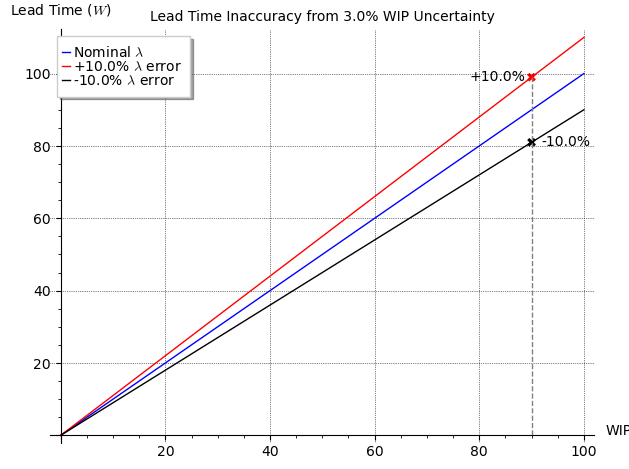

In [ ]:
Wt_high(wip) =  W_Little.subs([(s_lambda, max_lambda), (L, wip)])
Wt_low(wip) =  W_Little.subs([(s_lambda, min_lambda), (L, wip)])

Wt_high_value = Wt_lambda(max_lambda, ref_wip)
Wt_low_value = Wt_lambda(min_lambda, ref_wip)

Wt_low_error = 1-Wt_low_value/target_wt
Wt_high_error = Wt_high_value/target_wt-1

high_lambda = plot(Wt_high, (wip, min_wip, max_wip), legend_label="+{:.1f}% $\\lambda$ error".format(lambda_error*100), color='red')
low_lambda = plot(Wt_low, (wip, min_wip, max_wip), legend_label="-{:.1f}% $\\lambda$ error".format(lambda_error*100), color='black')

ref_wip_line = line([(ref_wip, 0), (ref_wip, Wt_high_value)], color="grey", linestyle='--')

ref_wip_high_point = point((ref_wip, Wt_high_value), color="red", marker="X", size=40)
ref_wip_high_label = text("+{:.1f}%".format(Wt_high_error*100), (ref_wip-wip_scale*1.3,Wt_high_value), color='black', fontsize=10)
ref_wip_low_point = point((ref_wip, Wt_low_value), color="black", marker="X", size=40)
ref_wip_low_label = text("-{:.1f}%".format(Wt_low_error*100), (ref_wip+wip_scale*1.3,Wt_low_value), color='black', fontsize=10)

ref_wip_points = ref_wip_line + ref_wip_high_point + ref_wip_low_point + ref_wip_low_label + ref_wip_high_label

diagram = nominal + high_lambda + low_lambda + ref_wip_points

diagram.legend(True)
diagram.axes_labels(['WIP', 'Lead Time ($W$)'])
diagram.axes_labels_size(1.0)

diagram.show(title="Lead Time Inaccuracy from {:.1f}% WIP Uncertainty".format(error*100), gridlines='automatic')

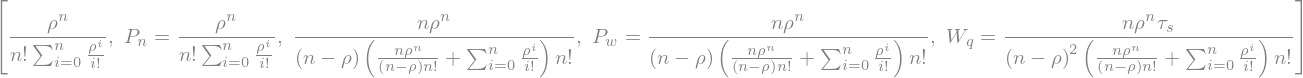

In [ ]:
## Erlang Definitions

i = sympy.Symbol("i")

erlang_sum = sympy.Sum(erlang_E**i/sympy.factorial(i),(i,0,n))

B_E_n = erlang_E**n/(sympy.factorial(n)*erlang_sum)

P_n = B_E_n

P_n_symbol = sympy.Symbol('P_n')
P_n_eq = sympy.Eq(P_n_symbol, P_n)

P_w_term = (erlang_E**n/sympy.factorial(n))*(n/(n-erlang_E))

P_w = P_w_term/(erlang_sum+P_w_term)
P_w_symbol = sympy.Symbol("P_w")
P_w_eq = sympy.Eq(P_w_symbol, P_w)

erlang_W_q_eq = sympy.Eq(W_q, tau_s*P_w/(n-erlang_E))

[P_n, P_n_eq, P_w, P_w_eq, erlang_W_q_eq]

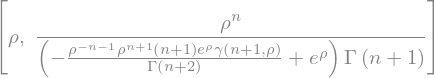

In [ ]:
[erlang_E.simplify(), P_n.simplify()]

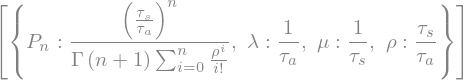

In [ ]:
solutions = sympy.solve([P_n_eq, rho_eq, arrival_rate_eq, processing_rate_eq], [P_n_symbol, rho, s_lambda, mu], dict=True)

solutions

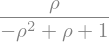

In [ ]:
## Wait time when large number of servers
P_w.subs(n, 1).simplify().simplify()


# Numerical Examples and Graphs

### Parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_v = 1.0
t_a = 1/lambda_v
t_s = 0.8
n_jobs = 10000
n_warmup = 700

# rho values
min_rho = 0.5
max_rho = 0.999
n_steps = 200
rho_var = np.linspace(min_rho, max_rho, n_steps)

sigma_var_step = 0.2
n_experiments = 10

sigma_vars = [sigma_var_step*i for i in range(n_experiments)]

starting = 120
ending = 15

### Lambdas

In [ ]:
from sympy.utilities.lambdify import lambdastr

w_mm1_lambda = sympy.lambdify((rho, tau_s), W_mm1)
w_gg1_lambda = sympy.lambdify((rho, tau_s, c_a, c_s), W_gg1)

In [ ]:

w_mm1_eval = [ w_mm1_lambda(rho_v, t_a*rho_v) for rho_v in rho_var ] # Fixed t_a --> Adjust t_s

w_mm1_eval


In [ ]:

plt.figure()
plt.plot(rho_var, w_mm1_eval)
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('M/M/1 Expected Sojourn Time')

plt.figure()
plt.plot(rho_var[starting:-ending], w_mm1_eval[starting:-ending])
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('M/M/1 Expected Sojourn Time -- Zoom In')

plt.show()


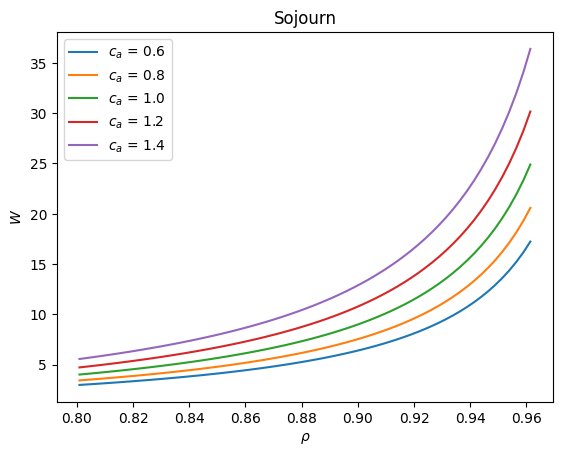

In [ ]:
c_a_vals = [t_a*v for v in [0.6, 0.8, 1.0, 1.2, 1.4]]

for c_a_v in c_a_vals:
    gg1_values = [w_gg1_lambda(rho_var[idx], t_a*rho_var[idx], c_a_v, 1.0) for idx in range(len(rho_var))]
    plt.plot(rho_var[starting:-ending], gg1_values[starting:-ending], label = "$c_a$ = %.1f"%c_a_v)
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('Sojourn')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import numpy.random as random

random.seed(113)

def gg1Sim(iat_dist, st_dist, n_jobs: int):
    inter_arrivals = [iat_dist() for i in range(n_jobs)]
    services = [st_dist() for i in range(n_jobs)]
    gg1 = [{"arrival": 0.0,
        "next_ia": inter_arrivals[0],
            "service": services[0],
            "start": 0.0,
            "departure": services[0],
            "wait": 0.0,
            "sojourn": services[0]
    }]

    for i in range(1, n_jobs):
        r = {
            "arrival": gg1[i-1]["arrival"]+gg1[i-1]["next_ia"],
            "next_ia": inter_arrivals[i], 
            "service": services[i]
        }
        r["start"] = np.max([gg1[i-1]["departure"], r["arrival"]])
        r["wait"] = r["start"] - r["arrival"]
        r["departure"] = services[i]+r["start"]
        r["sojourn"] = r["departure"] - r["arrival"]
        gg1.append(r)
    return gg1

def summarize(jobs, n_warmup: int, plot: bool = False):
    n_jobs = len(jobs)
    sojourns = [idx["sojourn"] for idx in jobs[n_warmup:n_jobs]]
    waits = [idx["wait"] for idx in jobs[n_warmup:n_jobs]]
    if plot:
        plt.figure()
        plt.hist(sojourns)
        plt.xlabel("Time")
        plt.ylabel("Count")
        plt.title("Sojourns")

        plt.figure()
        plt.hist(waits)
        plt.xlabel("Time")
        plt.ylabel("Count")
        plt.title("Waits")

        plt.figure()
        plt.plot([idx["start"] for idx in jobs], [idx["sojourn"] for idx in jobs])
        plt.xlabel('$start$')
        plt.ylabel('$W$')
        plt.title('Sojourn')

        plt.show()
    return {
        "samples": len(sojourns),
        "arrivals": np.average([idx["next_ia"] for idx in jobs[n_warmup:n_jobs]]), 
        "arrivals_std": np.std([idx["next_ia"] for idx in jobs[n_warmup:n_jobs]]),
        "services": np.average([idx["service"] for idx in jobs[n_warmup:n_jobs]]), 
        "services_std": np.std([idx["service"] for idx in jobs[n_warmup:n_jobs]]), 
        "sojourns": np.average(sojourns),
        "sojourns_std": np.std(sojourns),
        "sojourns_p90": np.percentile(sojourns, 90), 
        "waits": np.average(waits),
        "waits_std": np.std(waits)
    }


def mm1Sim(t_a: float, t_s: float, n_jobs: int):
    return gg1Sim(lambda: random.exponential(scale=t_a), lambda: random.exponential(t_s), n_jobs)


def mm1SimSummary(t_a: float, t_s: float, n_jobs: int, n_warmup: int, plot: bool = False):
    return summarize(mm1Sim(t_a, t_s, n_jobs), n_warmup, plot)



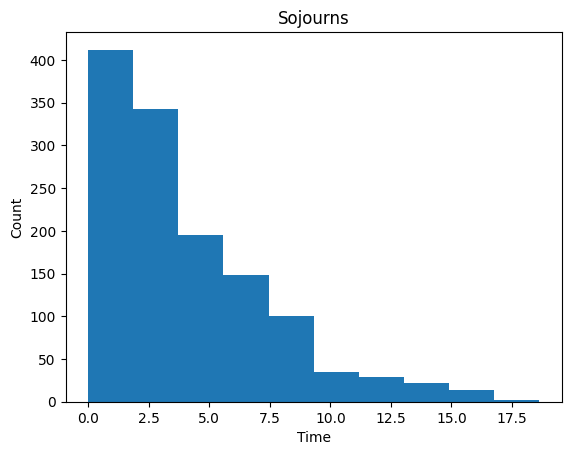

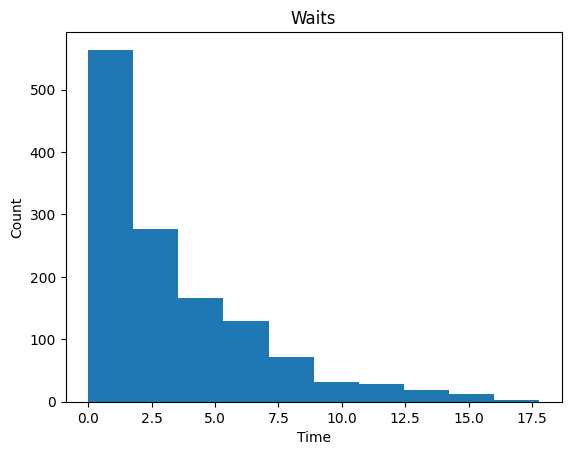

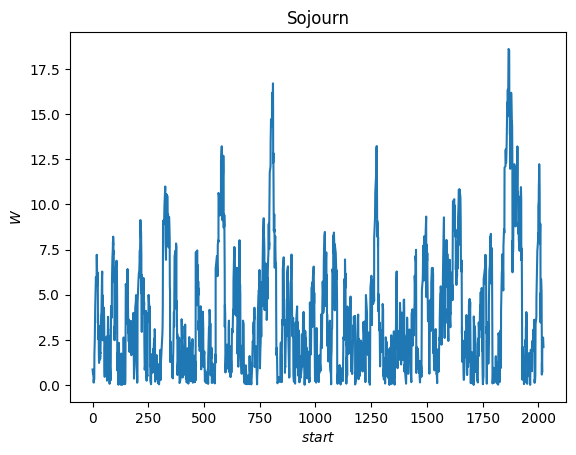

{'samples': 1300,
 'arrivals': 1.002199672633037,
 'arrivals_std': 1.0018432586205843,
 'services': 0.8269902044600118,
 'services_std': 0.8225907643142765,
 'sojourns': 4.0449086424228105,
 'sojourns_std': 3.4628900355579173,
 'sojourns_p90': 8.633881413336624,
 'waits': 3.2179184379627985,
 'waits_std': 3.3748270817055417}

In [ ]:
mm1SimSummary(t_a = 1.0, t_s = 0.8, n_jobs = 2000, n_warmup = n_warmup, plot = True)

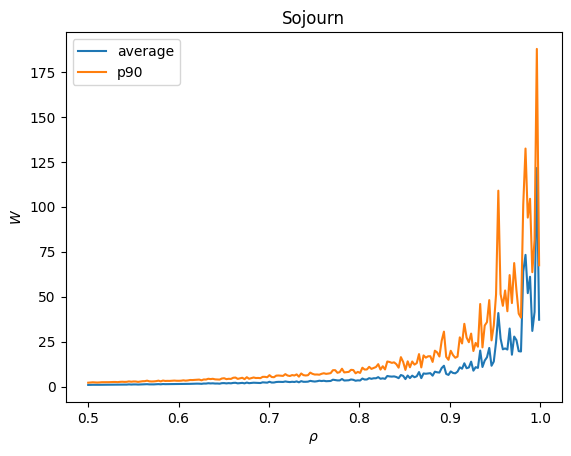

In [ ]:
mm1Summary = [mm1SimSummary(t_a = t_a, t_s = float(rho_v), n_jobs = n_jobs, n_warmup = n_warmup) for rho_v in rho_var]

mm1_avgs = [idx["sojourns"] for idx in mm1Summary]
mm1_p90s = [idx["sojourns_p90"] for idx in mm1Summary]


plt.figure()
plt.plot(rho_var, mm1_avgs, label="average")
plt.plot(rho_var, mm1_p90s, label="p90")
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('Sojourn')
plt.legend(loc='upper left')
plt.show()

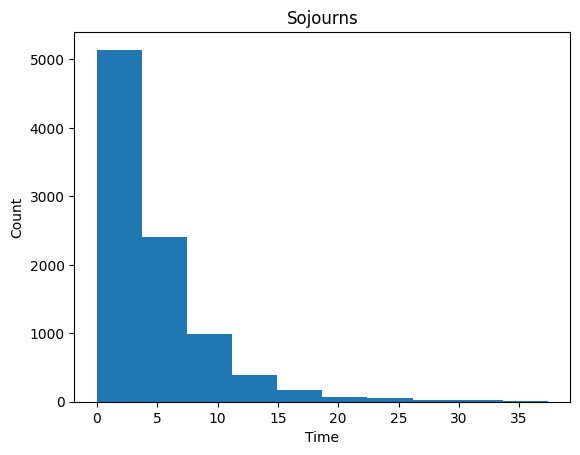

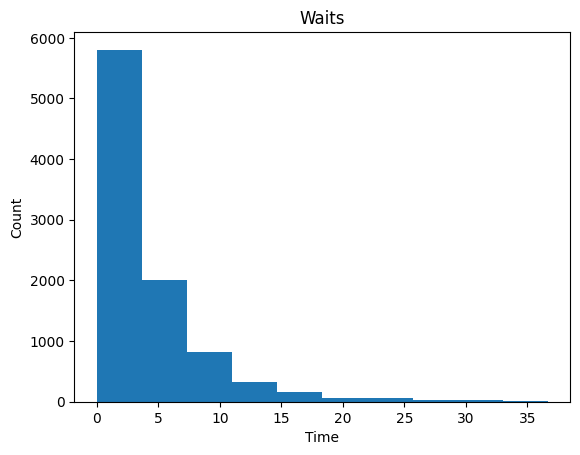

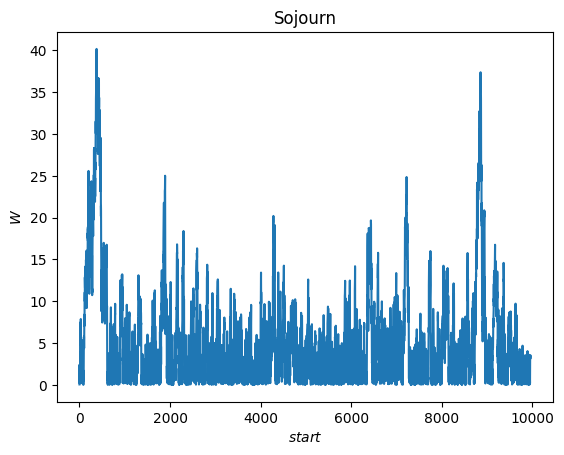

In [ ]:
summaries = summarize(gg1Sim(lambda : random.exponential(t_a) + random.normal(0.0, 0.5), lambda: random.exponential(t_s), n_jobs = n_jobs), n_warmup = n_warmup, plot = True)

In [ ]:
avg_sojourn = [idx["sojourns"] for idx in mm1Summary]
iat_s_measured = [idx["arrivals_std"] for idx in mm1Summary]

W_gg1_lambda = sympy.lambdify((rho, tau_s, c_a, c_s), W_gg1)

gg1Approx = [W_gg1_lambda(rho_var[idx], t_a*rho_var[idx], iat_s_measured[idx]/t_a, t_s/t_s) for idx in range(len(rho_var))]


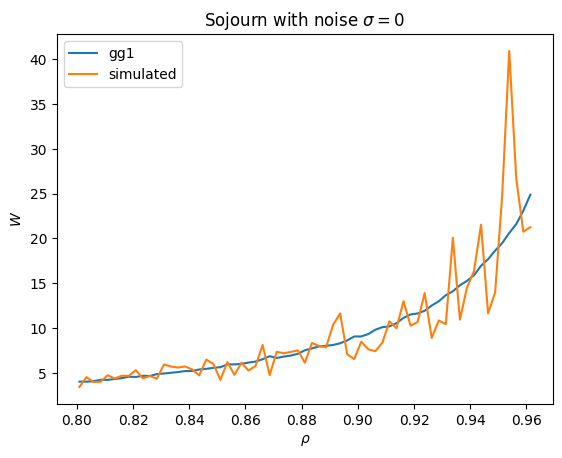

In [ ]:

plt.figure()
plt.plot(rho_var[starting:-ending], gg1Approx[starting:-ending], label='gg1' )
plt.plot(rho_var[starting:-ending], avg_sojourn[starting:-ending], label='simulated')
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title(f'Sojourn with noise $\sigma = 0$')
plt.legend(loc='upper left')

plt.show()

In [ ]:

""" jobs = [{ "sigma": sg,
          "samples": [{"rho": rho_v,
                        "jobs": gg1Sim(lambda : random.exponential(1.0) + random.normal(0.0, sg), 
                        lambda: random.exponential(float(rho_v)), 
                        n_jobs = n_jobs)
            } for rho_v in rho_var]
        } for sg in sigma_vars]
print(f"Generated {len(jobs)} experiments")
s = [{ "sigma": experiment["sigma"],
      "summaries": [summarize(samples["jobs"], n_warmup = warm_up) for samples in experiment["samples"]]
      } for experiment in jobs]
print(f"Summarized {len(jobs)} experiments") """
    #[summarize(rhoJobs, n_warmup = warm_up) for rhoJobs in jobs[i]] for i in range(n_experiments)]
experiments = list()
s = list()
#for i in range(10):
#    print("Step: "+str(i))
#    jobs.append([gg1Sim(lambda : random.exponential(1.0) + random.normal(0.0, 0.2*i), 
#                         lambda: random.exponential(float(rho_v)), 
#                         n_jobs = 10000)for rho_v in rho_var])
#    s.append([summarize(rhoJobs, n_warmup = 700) for rhoJobs in jobs[i]])
for sg in sigma_vars:
    print(f"Experiment for iat sigma: %.2f"%sg)
    exp = {
            "sigma": sg,
            "run": [{
                "rho": float(rho_v),
                "jobs": gg1Sim(
                    lambda: random.exponential(t_a) + random.normal(0.0, sg),
                    lambda: random.exponential(t_a*float(rho_v)),
                    n_jobs = n_jobs)
            } for rho_v in rho_var]
        }
    print("\t> Summarizing...")
    summary = {
            "sigma": exp["sigma"],
            "summaries": [{"rho": run["rho"],
                          "summary": summarize(run["jobs"], n_warmup=n_warmup)
             } for run in exp["run"]]
        } 
    experiments.append(exp)
    s.append(summary)


Experiment for iat sigma: 0.00
	> Summarizing...
Experiment for iat sigma: 0.20
	> Summarizing...
Experiment for iat sigma: 0.40
	> Summarizing...
Experiment for iat sigma: 0.60
	> Summarizing...
Experiment for iat sigma: 0.80
	> Summarizing...
Experiment for iat sigma: 1.00
	> Summarizing...
Experiment for iat sigma: 1.20
	> Summarizing...
Experiment for iat sigma: 1.40
	> Summarizing...
Experiment for iat sigma: 1.60
	> Summarizing...
Experiment for iat sigma: 1.80
	> Summarizing...


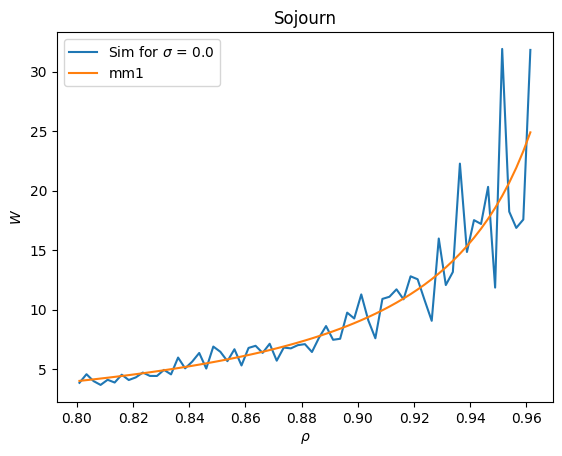

In [ ]:
plt.figure()
plt.plot(rho_var[starting:-ending],
            [idx["summary"]["sojourns"] for idx in s[0]["summaries"][starting:-ending]], 
            label = "Sim for $\\sigma$ = %.1f"%s[0]["sigma"])
plt.plot(rho_var[starting:-ending], w_mm1_eval[starting:-ending],
            label = "mm1")         
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('Sojourn')
plt.legend(loc="upper left")
plt.show()

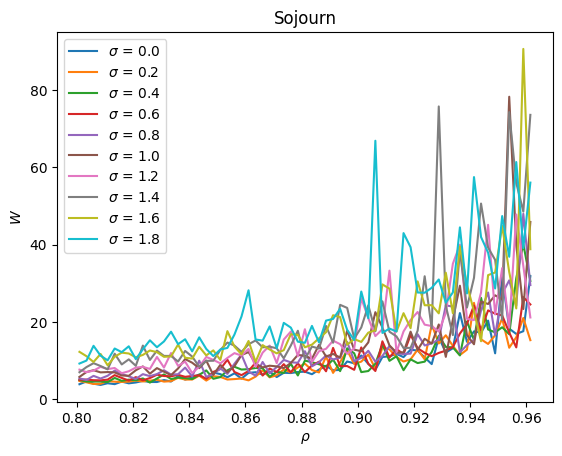

In [ ]:
plt.figure()
for experiment in s:
    plt.plot(rho_var[starting:-ending],
             [idx["summary"]["sojourns"] for idx in experiment["summaries"][starting:-ending]], 
             label = "$\\sigma$ = %.1f"%experiment["sigma"])
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('Sojourn')
plt.legend(loc="upper left")
plt.show()


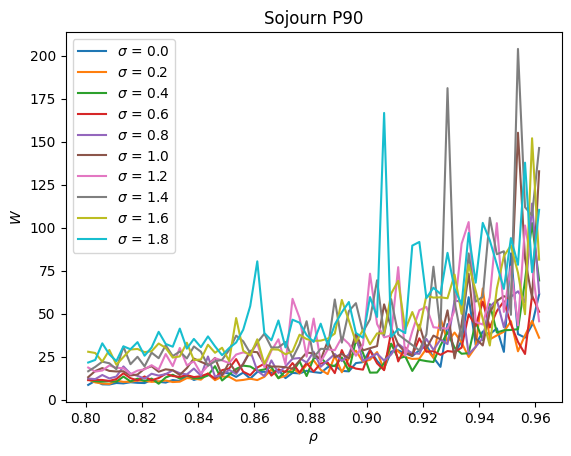

In [ ]:
plt.figure()
for experiment in s:
    plt.plot(rho_var[starting:-ending],
             [run["summary"]["sojourns_p90"] for run in experiment["summaries"][starting:-ending]],
             label = "$\\sigma$ = %.1f"%experiment["sigma"])
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title('Sojourn P90')
plt.legend(loc="upper left")
plt.show()

In [ ]:
errors = [(avg_sojourn[idx]-gg1Approx[idx])/gg1Approx[idx] if gg1Approx[idx] != 0 else 0 for idx in range(len(avg_sojourn))]
#errors = [(avg_sojourn[idx]-gg1Approx[idx]) for idx in range(len(avg_sojourn))]
np.average(errors)


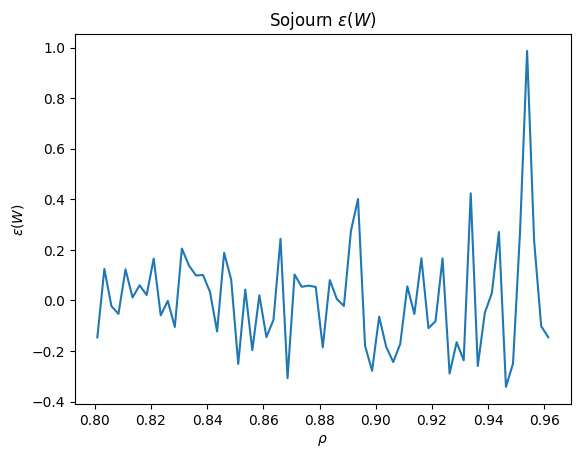

In [ ]:

plt.figure()
plt.plot(rho_var[starting:-ending], errors[starting:-ending])
plt.xlabel('$\\rho$')
plt.ylabel('$\\epsilon (W)$')
plt.title('Sojourn $\\epsilon(W)$')
#plt.plot(rho_var, gg1Approx )

plt.show()

## Least Squares Fit

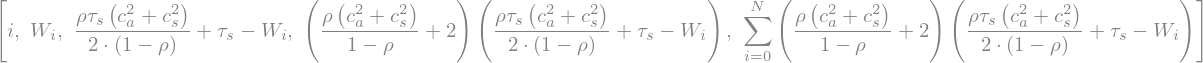

In [ ]:
x = sympy.Symbol("x")
sample_i = sympy.Symbol("i")
W_i = sympy.IndexedBase("W")
epsilon_i = W_gg1 - W_i[sample_i]

diff_i = sympy.diff(epsilon_i**2, tau_s)

N_samples = sympy.Symbol("N", integer=True)
errSumDiff = sympy.Sum(diff_i, (sample_i, 0, N_samples))

[sample_i, W_i[sample_i], epsilon_i, diff_i, errSumDiff]


In [ ]:

W_gg1_rho = W_gg1.subs([(c_s, 1.0)])
lambdastr(rho, expr=W_gg1_rho)

'lambda rho: ((1/2)*rho*tau_s*(c_a**2 + 1.0)/(1 - rho) + tau_s)'

In [ ]:
import lmfit

sigma_probe = 0.6

probe_summary = [sample_summary["summary"]["sojourns"] for se in s if se["sigma"] < sigma_probe*1.1 and se["sigma"] > sigma_probe*0.9 for sample_summary in se["summaries"]]
print(f'Probe Summary: {len(probe_summary)}')

sample_iat_std = np.sqrt(np.average([np.power(sm["summary"]["arrivals_std"],2) for se in s if se["sigma"] < sigma_probe*1.1 and se["sigma"] > sigma_probe*0.9 for sm in se["summaries"]]))
print(f'Probe IAT Std: {sample_iat_std}')

W_gg1_rho_lambda = sympy.lambdify((rho, tau_s, c_a), W_gg1_rho)

gg1_model = lmfit.Model(W_gg1_rho_lambda)
print(f'parameter names: {gg1_model.param_names}')
print(f'Independent Variables: {gg1_model.independent_vars}')

# one set of parameters to test: Sigma = 0
#params = gg1_model.make_params(tau_s = t_s, c_a = sample_iat_std/t_a)
c_a_guess = sample_iat_std/t_a
params = gg1_model.make_params(
    tau_s = dict(value = t_s, min=t_s*0.5, max=t_s*2.0),
    c_a = dict(value = c_a_guess, min=c_a_guess*0.9, max=c_a_guess*1.1, vary=False))
model_sample_result = gg1_model.eval(params, rho=rho_var)
params


Probe Summary: 200
Probe IAT Std: 1.1661612847880283
parameter names: ['tau_s', 'c_a']
Independent Variables: ['rho']


name,value,initial value,min,max,vary
tau_s,0.80000000,0.8,0.40000000,1.60000000,True
c_a,1.16616128,1.1661612847880283,1.04954516,1.28277741,False


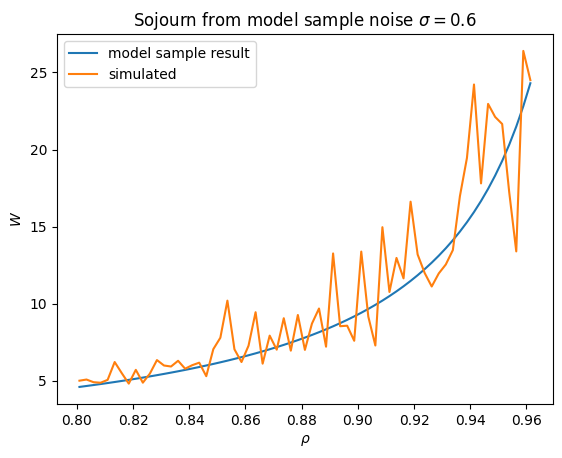

In [ ]:
plt.figure()
plt.plot(rho_var[starting:-ending], model_sample_result[starting:-ending], label='model sample result' )
plt.plot(rho_var[starting:-ending], probe_summary[starting:-ending],
         label='simulated' )
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title(f'Sojourn from model sample noise $\\sigma = {sigma_probe}$')
plt.legend(loc='upper left')

plt.show()

### Fitting from `starting` to `-ending`

In [ ]:
gg1_fit_result = gg1_model.fit(probe_summary[starting:-ending], params, rho = rho_var[starting:-ending])
gg1_fit_result

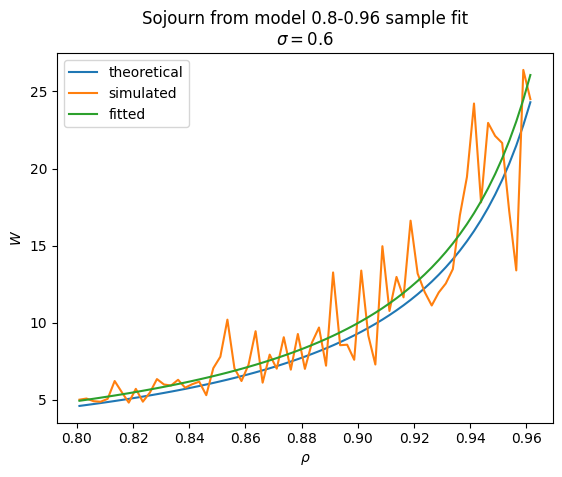

In [ ]:
plt.figure()
plt.plot(rho_var[starting:-ending], model_sample_result[starting:-ending], label='theoretical' )
plt.plot(rho_var[starting:-ending], probe_summary[starting:-ending],
         label='simulated' )
plt.plot(rho_var[starting:-ending], gg1_fit_result.eval(), label='fitted' )
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title(f'Sojourn from model 0.8-0.96 sample fit\n$\\sigma = {sigma_probe}$')
plt.legend(loc='upper left')

plt.show()

### 2 Point Fitting `[starting+4, -ending-4]

In [ ]:
gg1_fit_result_2 = gg1_model.fit([probe_summary[starting+4], probe_summary[-ending-4]], 
                                 params, 
                                 rho = [rho_var[starting+4], rho_var[-ending-4]])
gg1_fit_result_2

In [ ]:
print(gg1_fit_result_2.summary()["params"])

[('tau_s', 0.6867066363179942, True, None, 0.4, 1.6, None, 0.03512354677026708, {}, 0.8, None), ('c_a', 1.1661612847880283, False, None, 1.0495451563092255, 1.2827774132668313, None, 0, None, 1.1661612847880283, None)]


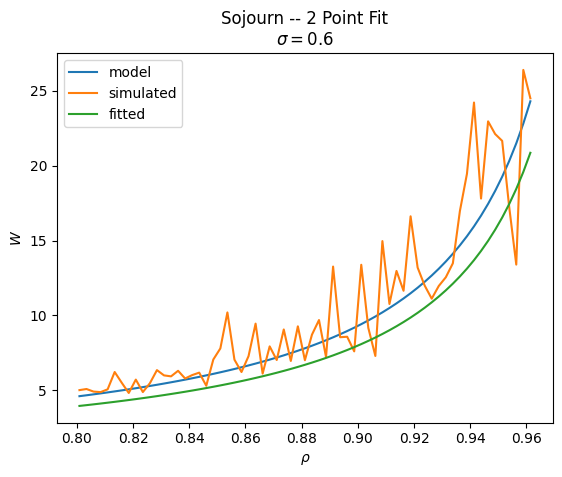

In [ ]:

fitted = [w_gg1_lambda(rho_val, gg1_fit_result_2.summary()["params"][0][1], gg1_fit_result_2.summary()["params"][1][1], 1.0) for rho_val in rho_var]

plt.figure()
plt.plot(rho_var[starting:-ending], model_sample_result[starting:-ending], label='model' )
plt.plot(rho_var[starting:-ending], probe_summary[starting:-ending],
         label='simulated' )
plt.plot(rho_var[starting:-ending], fitted[starting:-ending], label='fitted' )
plt.xlabel('$\\rho$')
plt.ylabel('$W$')
plt.title(f'Sojourn -- 2 Point Fit\n$\\sigma = 0.6$')
plt.legend(loc='upper left')

plt.show()